In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import seaborn as sns
import sys
import time

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC  
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

from lightning.classification import FistaClassifier

%matplotlib inline 

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#df.info()

Outcome
0    500
1    268
dtype: int64


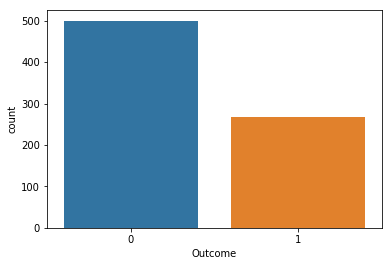

In [4]:
print(df.groupby('Outcome').size())
sns.countplot(df['Outcome'],label="Count")
plt.show()

In [5]:
test_per = int(len(df.index)*0.9)   #actual is 0.1-0.9
print("test size:", int(len(df.index)- test_per))
testdf = df[test_per:]
df = df[:test_per]
df.shape
print(df.groupby('Outcome').size())

test size: 77
Outcome
0    454
1    237
dtype: int64


In [6]:
def add_labelnoise(noise_level, seed=None):
    np.random.seed(seed) 
    l = int(noise_level*len(df.index))
    for i in range(l):
        if df['Outcome'][i]==1:
            df['Outcome'][i]=0
        elif df['Outcome'][i]==0:
            df['Outcome'][i]=1

add_labelnoise(0.30)
df.head()

c:\python35\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
c:\python35\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,0


In [7]:
print(df.groupby('Outcome').size())

Outcome
0    399
1    292
dtype: int64


In [8]:
# def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
#     np.random.seed(seed)
#     perm = np.random.permutation(df.index)
#     m = len(df.index)
#     train_end = int(train_percent * m)
#     validate_end = int(validate_percent * m) + train_end
#     train = df.ix[perm[:train_end]]
#     validate = df.ix[perm[train_end:validate_end]]
#     test = df.ix[perm[validate_end:]]
#     return train, validate, test

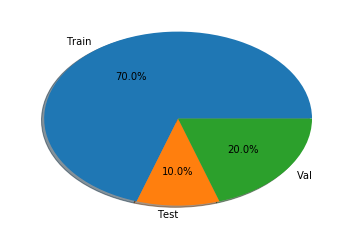

Train set (483, 9)
Test set (77, 9)
Validation set (208, 9)
Outcome
0    269
1    214
dtype: int64


In [9]:
#split our data into train and test
#traindf, testdf = train_test_split(df, test_size = 0.3)
#traindf, valdf, testdf = train_validate_test_split(df, train_percent=.7, validate_percent=.2, seed=None)
traindf, valdf = train_test_split(df, test_size = 0.3)
labels = 'Train', 'Test', 'Val'
plt.pie([70, 10, 20], labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()
print("Train set", traindf.shape)
print("Test set", testdf.shape)
print("Validation set", valdf.shape)

print(traindf.groupby('Outcome').size())

In [10]:
train_X=traindf[traindf.columns[:8]]
val_X=valdf[testdf.columns[:8]]
train_Y=traindf['Outcome']
val_Y=valdf['Outcome']
test_X=testdf[testdf.columns[:8]]
test_Y=testdf['Outcome']

In [17]:
X = train_X
y = train_Y

clf = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=1e-3, C=1.0,
               multi_class='ovr', fit_intercept=True, intercept_scaling=1,
               class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())


Accuracy : 0.7272727272727273
Cross_val score : 0.5909407665505226


In [12]:
clf = LinearSVC(penalty='l2', loss='hinge', dual=True, tol=1e-3, C=1.0,
               multi_class='ovr', fit_intercept=True, intercept_scaling=1,
               class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=7, scoring='accuracy')
print("Cross_val score :", scores.mean())


Accuracy : 0.5324675324675324
Cross_val score : 0.48568780126066


In [13]:
clf = SGDClassifier(loss='hinge', penalty='l1', alpha=0.0001, l1_ratio=0.15,
                    fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True,
                    verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, 
                    class_weight=None, warm_start=False, average=False, n_iter=None)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())

Accuracy : 0.5714285714285714
Cross_val score : 0.5239256678281069


In [36]:
clf = SGDClassifier(loss='squared_hinge', penalty='l1', alpha=0.0001, l1_ratio=0.15,
                    fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True,
                    verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, 
                    class_weight=None, warm_start=False, average=False, n_iter=None)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())

Accuracy : 0.6103896103896104
Cross_val score : 0.5335656213704995


In [35]:
    clf = SGDClassifier(loss='modified_huber', penalty='l1', alpha=0.0001, l1_ratio=0.15,
                        fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True,
                        verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, 
                        class_weight=None, warm_start=False, average=False, n_iter=None)
    clf.fit(X,y)
    print("Accuracy :", clf.score(test_X, test_Y))
    scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
    print("Cross_val score :", scores.mean())

Accuracy : 0.42857142857142855
Cross_val score : 0.5722415795586528


## FISTA

In [16]:
# Set classifier options.
clf = FistaClassifier(C=1.0, alpha=1.0, loss='squared_hinge', penalty='l1',
                      multiclass=False, max_iter=1000, max_steps=30, eta=2.0,
                      sigma=1e-05, callback=None, verbose=0  )

# Train the model.
clf.fit(X, y)


# Accuracy
print("Accuracy :", clf.score(test_X, test_Y))

# Percentage of selected features
print(clf.n_nonzero(percentage=True))

scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())


c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.6883116883116883
1.0


c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.si

Cross_val score : 0.6110336817653892


c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
